In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [2]:
# Load data
list_of_files = ['C:/Users/user/Downloads/pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject101.dat',
                 'C:/Users/user/Downloads/pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject102.dat',
                 'C:/Users/user/Downloads/pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject103.dat',
                 'C:/Users/user/Downloads/pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject104.dat',
                 'C:/Users/user/Downloads/pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject105.dat',
                 'C:/Users/user/Downloads/pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject106.dat',
                 'C:/Users/user/Downloads/pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject107.dat',
                 'C:/Users/user/Downloads/pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject108.dat',
                 'C:/Users/user/Downloads/pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [3]:
import pandas as pd

# Make sure to use 'df' as the DataFrame name
df = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    df = pd.concat([df, procData], ignore_index=True)

df.reset_index(drop=True, inplace=True)

In [4]:
def dataCleaning(df):
    # Drop orientation columns
    df = df.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                  'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                  'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'], axis=1)
    
    # Remove rows where activityID is 0 (transient activity)
    df = df[df.activityID != 0]
    
    # Convert all data to numeric, using 'coerce' which will set errors to NaN
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Interpolate to fill NaN values based on surrounding data
    df = df.interpolate()
    
    return df


In [5]:
dataCol = dataCleaning(df)

In [6]:
dataCol.reset_index(drop = True, inplace = True)
dataCol.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


In [7]:
dataCol.isnull().sum()

timestamp           0
activityID          0
heartrate           4
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

In [8]:
for i in range(0,4):
    dataCol["heartrate"].iloc[i]=100

C:\Users\user\AppData\Local\Temp\ipykernel_11984\1504362193.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataCol["heartrate"].iloc[i]=100
C:\Users\user\AppData\Local\Temp\ipykernel_11984\1504362193.py:2: SettingWithCopyWarning: 
A val

In [9]:
dataCol.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

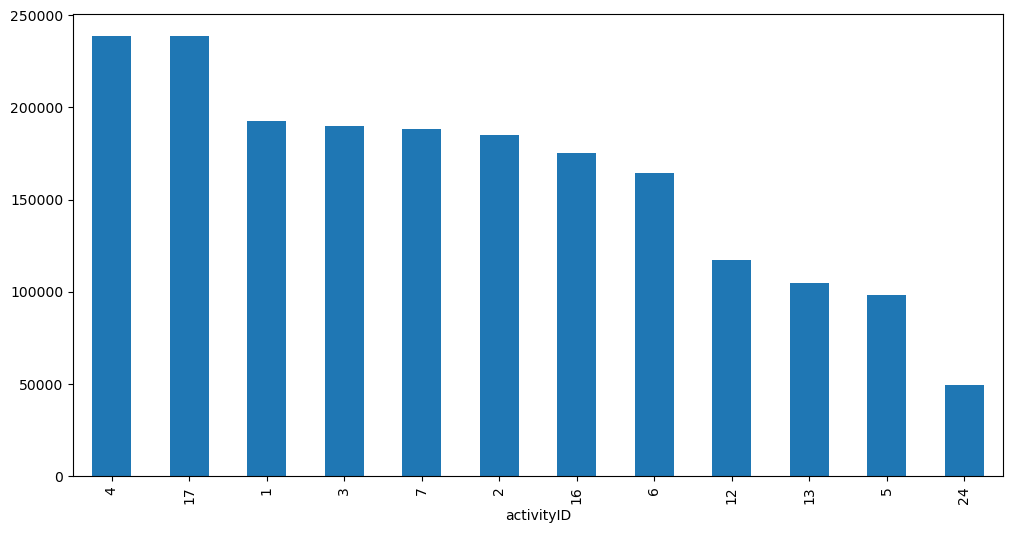

In [10]:
dataCol['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

In [11]:
train_df = dataCol.sample(frac=0.8, random_state=1)
test_df = dataCol.drop(train_df.index)

In [12]:
train_df.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,...,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06
mean,1.705049e+03,8.080534e+00,1.074758e+02,3.275138e+01,-4.953526e+00,3.581113e+00,3.603514e+00,-4.886385e+00,3.570863e+00,3.787763e+00,...,9.374706e+00,-4.445267e-02,-2.175620e+00,1.027736e-02,-3.649406e-02,5.607242e-03,-3.157962e+01,1.394841e+00,1.725137e+01,4.566578e+00
std,1.093592e+03,6.175064e+00,2.699031e+01,1.794207e+00,6.239143e+00,6.886169e+00,3.958145e+00,6.245060e+00,6.585066e+00,3.945398e+00,...,6.067489e+00,7.183548e+00,3.475628e+00,1.126197e+00,6.380780e-01,2.011908e+00,1.834688e+01,2.168353e+01,1.969368e+01,2.333375e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-6.114200e+01,-6.190350e+01,-6.231480e+01,-1.416200e+01,-1.304010e+01,-1.401960e+01,-1.726240e+02,-1.379080e+02,-1.027160e+02,1.000000e+00
25%,7.442925e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.970020e+00,1.057830e+00,1.162090e+00,-8.867070e+00,1.055562e+00,1.365070e+00,...,8.396590e+00,-2.073120e+00,-3.399390e+00,-2.081647e-01,-1.066462e-01,-4.416657e-01,-4.170160e+01,-1.246927e+01,3.799632e+00,2.000000e+00
50%,1.480090e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.449130e+00,3.525300e+00,3.432840e+00,-5.377104e+00,3.566820e+00,3.663470e+00,...,9.550020e+00,-2.252810e-01,-1.993145e+00,4.636280e-03,-3.977450e-03,-2.336400e-03,-3.400060e+01,7.672570e-01,1.876795e+01,5.000000e+00
75%,2.664000e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.581007e-01,6.450508e+00,6.532445e+00,-9.061720e-01,6.458267e+00,6.778200e+00,...,1.028160e+01,1.920960e+00,-5.958823e-01,1.308070e-01,1.160640e-01,9.121635e-02,-1.789610e+01,1.782927e+01,3.120910e+01,7.000000e+00
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,6.196930e+01,6.204900e+01,6.093570e+01,1.742040e+01,1.358820e+01,1.448270e+01,9.155160e+01,9.369920e+01,1.469000e+02,9.000000e+00


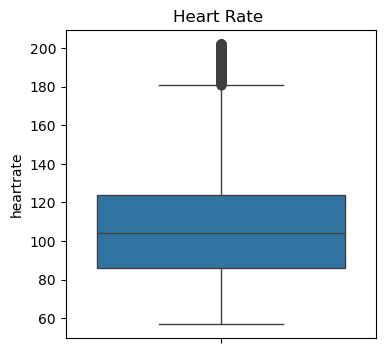

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y=train_df["heartrate"])

<Axes: xlabel='activityID'>

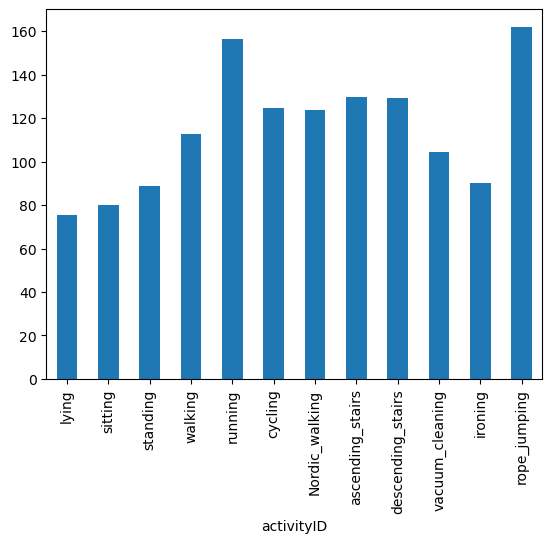

In [14]:
df_hr_act = train_df['heartrate'].groupby(train_df['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
df_hr_act.plot(kind='bar')

In [15]:
dataCol.to_csv("C:/Users/user/Downloads/PAMAP2.csv")